<center><h1>Project 4</h1></center>
<center><h2>Tweets of Elon Musk - Topic Modeling</h2></center>
<center><h2>Team 8</h2></center>

<br>
The aim of this project is to do topic modeling on the tweets of Elon Musk, extracted from July 2017 to early May 2018. 
<br>
<br>

In [13]:
import pandas as pd
import string
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import pyLDAvis

In [2]:
# Loading documents/tweets
# To change file path before use

df_tweets = pd.read_csv("C:/Users/IBM_ADMIN/Desktop/WCD-PythonDS-Student-B7/projects/data/elonmusk_tweets.csv")
df_text = df_tweets[["cleaning_text"]]
df_text.head()

,cleaning_text
0,sigh i do like ty but she s a friend we are no...
1,saying you like moats is just a nice way of sa...
2,warren buffett is huge in candy it s actually ...
3,i m killin me lol
4,then i m going to build a moat fill it w candy...


In [3]:
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

In [4]:
text = df_text.applymap(cleaning)['cleaning_text']
print(text)
text_list = [i.split() for i in text]

0                             sigh like ty friend dating
1        saying like moat nice way saying like oligopoly
2                warren buffett huge candy actually true
3                                             killin lol
4      going build moat fill w candy warren b able re...
5                                            cryptocandy
6                       ok ok sake argument u wish candy
7                                           think living
8                occurred plot willy wonka really messed
9                                    super super serious
10                  starting candy company going amazing
11                                                bigger
12                                         try hard help
13              thanks letting know expedite sorry delay
14     look like sooner expected sheer magnitude shor...
15                                          new roadster
16                                        yes definitely
17                          nex

In [6]:
# Build dictionary of unique tokens, each assigned to a unique number

from gensim import corpora
dictionary = corpora.Dictionary(text_list)
dictionary.save('elondict.dict')
print(dictionary)

Dictionary(2544 unique tokens: ['dating', 'friend', 'like', 'sigh', 'ty']...)


In [7]:
# Build document term matrix

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [8]:
import gensim
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

ldamodel.show_topics(0, 10)


[(3,
  '0.008*"tunnel" + 0.008*"hell" + 0.007*"need" + 0.007*"make" + 0.005*"going" + 0.005*"model" + 0.005*"car" + 0.005*"pm" + 0.005*"rocket" + 0.005*"one"'),
 (0,
  '0.017*"good" + 0.012*"yes" + 0.010*"point" + 0.009*"actually" + 0.009*"orbit" + 0.008*"rt" + 0.006*"confirmed" + 0.006*"successful" + 0.005*"model" + 0.005*"maybe"'),
 (5,
  '0.014*"rocket" + 0.010*"tesla" + 0.008*"th" + 0.007*"like" + 0.006*"high" + 0.006*"car" + 0.006*"love" + 0.005*"spacex" + 0.005*"would" + 0.005*"cost"'),
 (9,
  '0.018*"rt" + 0.013*"ai" + 0.012*"right" + 0.012*"live" + 0.011*"car" + 0.008*"u" + 0.008*"launch" + 0.007*"like" + 0.007*"china" + 0.007*"webcast"'),
 (7,
  '0.013*"rt" + 0.009*"one" + 0.009*"space" + 0.008*"tesla" + 0.007*"make" + 0.006*"really" + 0.006*"time" + 0.006*"much" + 0.004*"model" + 0.004*"first"'),
 (1,
  '0.011*"rt" + 0.011*"true" + 0.010*"maybe" + 0.010*"tesla" + 0.010*"first" + 0.008*"video" + 0.007*"great" + 0.007*"hat" + 0.006*"rocket" + 0.005*"boring"'),
 (6,
  '0.045*"fa

In [10]:
# Save corpus for visualization later

corpora.MmCorpus.serialize('eloncorpus.mm', doc_term_matrix) 

In [11]:
# Save model

ldamodel.save('elontopic.model')

In [15]:
# Point to correct data paths and initialize for visualization

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

d = gensim.corpora.Dictionary.load('elondict.dict')
c = gensim.corpora.MmCorpus('eloncorpus.mm')
lda = gensim.models.LdaModel.load('elontopic.model')

In [16]:
data = pyLDAvis.gensim.prepare(lda,c,d)

D:\Anaconda3\envs\wcd-ds\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [17]:
# Visualize 

data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      14.619008        1       1 -0.027963 -0.113601
1      11.185195        1       2 -0.105167  0.019454
7      11.104113        1       3 -0.046339  0.049627
9      10.260018        1       4  0.149092 -0.022073
8       9.288384        1       5  0.110590  0.028469
5       9.230549        1       6 -0.035067 -0.047451
6       9.214545        1       7 -0.008531  0.168189
0       8.535591        1       8  0.021795 -0.018606
4       8.500507        1       9 -0.043744 -0.018884
3       8.062085        1      10 -0.014667 -0.045125, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
183   Default  37.000000       falcon  37.000000  30.0000  30.0000
831   Default  17.000000        heavy  17.000000  29.0000  29.0000
268   Default  27.000000       launch  27.000000  28.0000  28.0000
148   Default  18.000000         good  18.000000  27.0000  27.0000
507   Default  20.000000        right  20.000000  26.0000  26.0000
275   Default  23.000000       rocket  23.000000  25.0000  25.0000
71    Default  11.000000          yes  11.000000  24.0000  24.0000
104   Default  33.000000        model  33.000000  23.0000  23.0000
501   Default  14.000000         sure  14.000000  22.0000  22.0000
36    Default   9.000000        think   9.000000  21.0000  21.0000
87    Default  11.000000         live  11.000000  20.0000  20.0000
110   Default  50.000000        tesla  50.000000  19.0000  19.0000
14    Default  11.000000         true  11.000000  18.0000  18.0000
292   Default   7.000000        point   7.000000  17.0000  17.0000
82    Default  21.000000         soon  21.000000  16.0000  16.0000
153   Default  17.000000         yeah  17.000000  15.0000  15.0000
353   Default  14.000000        maybe  14.000000  14.0000  14.0000
445   Default  19.000000           ai  19.000000  13.0000  13.0000
56    Default   9.000000        sorry   9.000000  12.0000  12.0000
473   Default   9.000000        orbit   9.000000  11.0000  11.0000
1420  Default  15.000000          hat  15.000000  10.0000  10.0000
70    Default   8.000000   definitely   8.000000   9.0000   9.0000
224   Default  72.000000           rt  72.000000   8.0000   8.0000
1452  Default   6.000000         hell   6.000000   7.0000   7.0000
180   Default  27.000000       spacex  27.000000   6.0000   6.0000
372   Default  12.000000       tunnel  12.000000   5.0000   5.0000
128   Default  24.000000        first  24.000000   4.0000   4.0000
205   Default  15.000000         make  15.000000   3.0000   3.0000
10    Default  11.000000     actually  11.000000   2.0000   2.0000
314   Default   9.000000        stage   9.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
1940  Topic10   0.755383   unexpected   1.403419   1.8986  -6.5488
1938  Topic10   0.755383  application   1.403419   1.8986  -6.5488
466   Topic10   2.128806        every   5.703060   1.5326  -5.5127
340   Topic10   1.442106        smart   3.509218   1.6287  -5.9022
1192  Topic10   1.442077      getting   3.522739   1.6248  -5.9022
761   Topic10   1.442097         plus   3.537259   1.6207  -5.9022
12    Topic10   1.442100        candy   3.558352   1.6148  -5.9022
829   Topic10   1.626397      another   4.238740   1.5601  -5.7819
1939  Topic10   1.442097       friday   3.566607   1.6125  -5.9022
873   Topic10   1.442090       second   3.591827   1.6054  -5.9022
408   Topic10   3.502301         need  14.105856   1.1248  -5.0149
205   Topic10   3.502270         make  15.655130   1.0206  -5.0149
23    Topic10   2.815585        going  15.123615   0.8369  -5.2331
275   Topic10   2.733439       rocket  23.079538   0.3846  -5.2627
524   Topic10   2.588542          one  22.219427   0.3681  -5.3172
220   Topic10   2.815546          car  31.310648   0.1092  -5.2332
104   Topic10   2.815556  

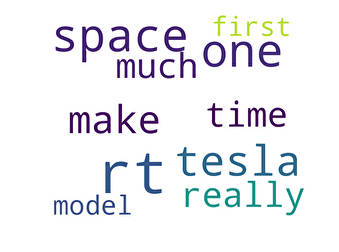

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
topic = ldamodel.show_topics(0, 10)[0][1].split(' + ')
topic_word_freq = {w.split('*')[1].strip('"'):float(w.split('*')[0]) for w in topic}
wordcloud = WordCloud(max_font_size=160, 
                          relative_scaling=0.7,
                          background_color='white',
                          width=800,
                          height=600).generate_from_frequencies(topic_word_freq )
plt.figure()
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()